# Clustering 

## 1. DBSCAN
Using DBSCAN iterate (for-loop) through different values of `min_samples` (1 to 10) and `epsilon` (.05 to .5, in steps of .01)  to find clusters in the road-data used in the Lesson and calculate the Silohouette Coeff for `min_samples` and `epsilon`. Plot **_one_** line plot with the multiple lines generated from the min_samples and epsilon values. Use a 2D array to store the SilCoeff values, one dimension represents `min_samples`, the other represents epsilon.

Expecting a plot of `epsilon` vs `sil_score`.

In [193]:
import pandas as pd
import numpy as np
# allow plots to appear in the notebook
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.size'] = 14
# plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [194]:
X = pd.read_csv('../data/3D_spatial_network.txt.gz', header=None, names=['osm', 'lat','lon','alt'])
X = X.drop(['osm'], axis=1).sample(10000)
X.head()

,lat,lon,alt
75074,10.325155,57.511536,16.207941
127603,9.769793,57.444463,24.075419
416252,9.254681,56.969839,1.219575
277528,10.242851,57.528867,24.732207
321051,9.964044,57.013796,24.863577


In [195]:
X_normed = X.copy()
X_normed['alt'] = (X.alt - X.alt.mean())/X.alt.std()
X_normed['lat'] = (X.lat - X.lat.mean())/X.lat.std()
X_normed['lon'] = (X.lon - X.lon.mean())/X.lon.std()

In [196]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [197]:
min_samples = range(1, 10)
epsilons = np.arange(0.05, 0.5, 0.01)

In [ ]:
all_scores = []
for min_sample in min_samples:
    scores = []
    for epsilon in epsilons:
        dbscan = DBSCAN(eps=epsilon, min_samples=min_sample)
        X_normed["cluster"] = dbscan.fit_predict(X_normed[['lat','lon', 'alt']])
        
        # calculate silouette score here
        score = metrics.silhouette_score(X_normed[['lon', 'lat', 'alt']], X_normed.cluster)
        scores.append(score)
    all_scores.append(scores)

<IPython.core.display.Javascript object>


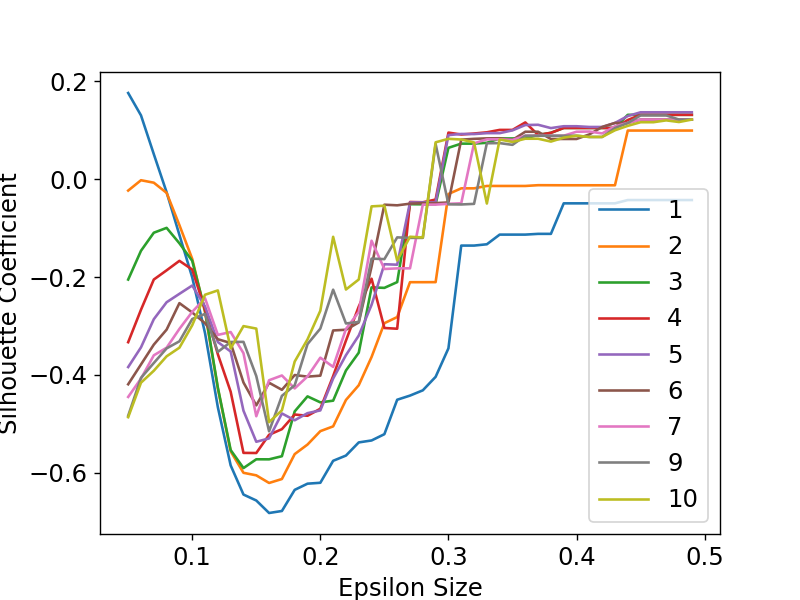

In [112]:
plt.figure()
plot = plt.plot(epsilons, all_scores[0], 
         epsilons, all_scores[1], 
         epsilons, all_scores[2], 
         epsilons, all_scores[3], 
         epsilons, all_scores[4], 
         epsilons, all_scores[5], 
         epsilons, all_scores[6], 
         epsilons, all_scores[7], 
         epsilons, all_scores[8])
plt.xlabel('Epsilon Size')
plt.ylabel('Silhouette Coefficient')
plt.legend(plot, ['1', '2', '3', '4', '5', '6', '7', '9', '10'])
plt.show()

In [198]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
X_normed["cluster"] = dbscan.fit_predict(X_normed[['lat','lon', 'alt']])

In [199]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


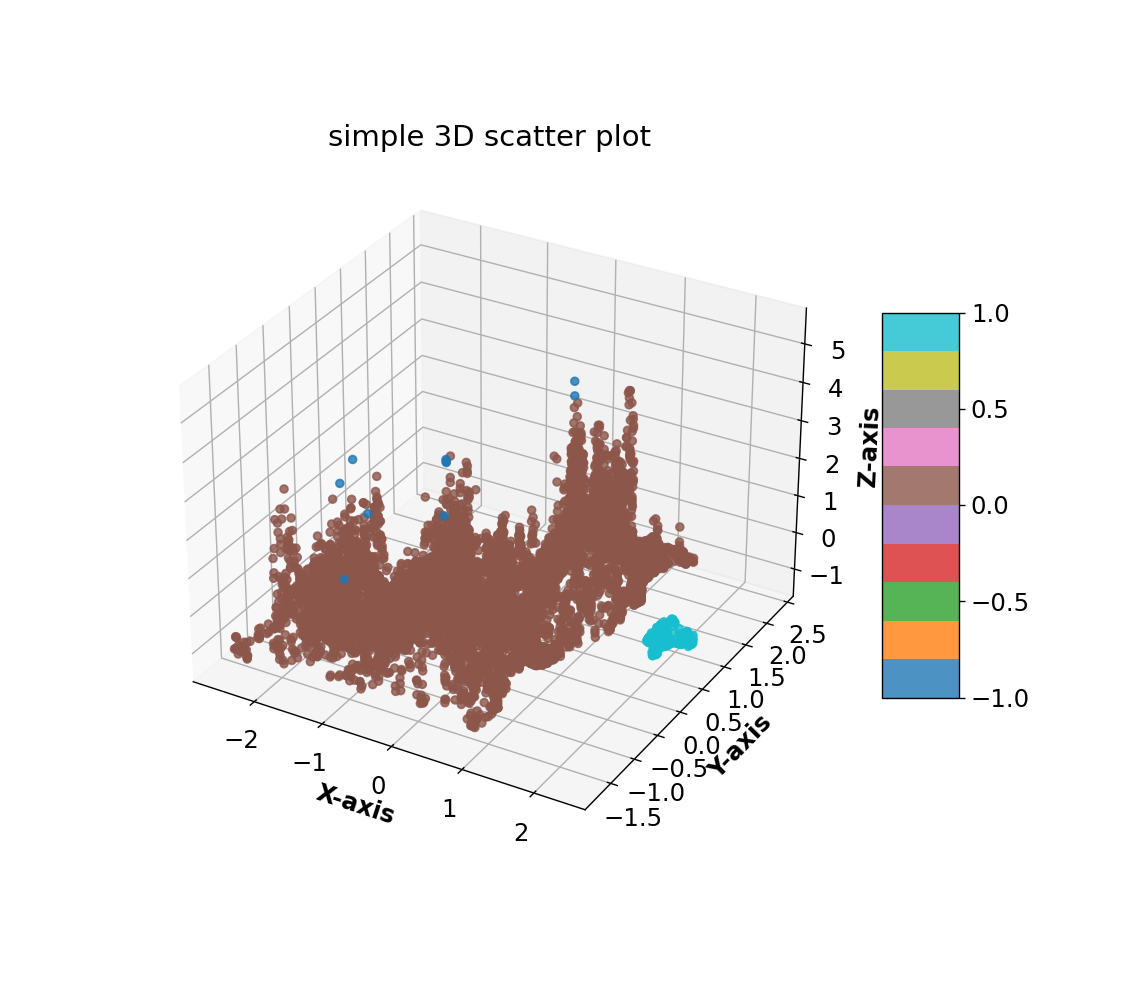

In [200]:
fig = plt.figure(figsize = (9, 8))
ax = plt.axes(projection ="3d")

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
plot2 = ax.scatter3D(X_normed["lat"], X_normed["lon"], X_normed["alt"],
                    alpha = 0.8,
                    c = X_normed["cluster"],
                    cmap = "tab10"
                    )
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
fig.colorbar(plot2, ax = ax, shrink = 0.5, aspect = 5)

plt.show()

## 2. Clustering your own data
Using your own data, find relevant clusters/groups within your data (repeat the above). If your data is labeled with a class that you are attempting to predict, be sure to not use it in training and clustering. 

You may use the labels to compare with predictions to show how well the clustering performed using one of the clustering metrics (http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). 

If you don't have labels, use the silhouette coefficient to show performance. Find the optimal fit for your data but you don't need to be as exhaustive as above.

Additionally, show the clusters in 2D or 3D plots. 

As a bonus, try using PCA first to condense your data from N columns to less than N.

Two items are expected: 
- Metric Evaluation Plot (like in 1.)
- Plots of the clustered data

In [308]:
balt_crime = pd.read_csv('../data/BPD_Part_1_Victim_Based_Crime_Data.csv')
lat_lon = balt_crime["Location 1"].str.strip('()').str.split(', ', expand=True).rename(columns={0:'Lat', 1:'Lon'})
balt_crime = pd.concat([balt_crime, lat_lon], axis=1)
balt_crime = balt_crime.drop(["CrimeDate", "CrimeCode", "Location", "Inside/Outside", "Weapon", "Post", "District", 
                              "Neighborhood", "Total Incidents", "Location 1"], axis=1)
balt_crime = balt_crime.dropna()
balt_crime = balt_crime.sample(5000).reset_index(drop=True)

balt_crime.head()

,CrimeTime,Description,Lat,Lon
0,20:13:00,BURGLARY,39.2281100000,-76.5903000000
1,00:00:00,LARCENY FROM AUTO,39.2512300000,-76.6247500000
2,20:48:00,AGG. ASSAULT,39.3034600000,-76.6674800000
3,13:45:00,AGG. ASSAULT,39.2818800000,-76.6795600000
4,10:00:00,LARCENY FROM AUTO,39.2951700000,-76.5759500000


In [309]:
balt_crime["Seconds"] = pd.to_timedelta(balt_crime['CrimeTime'], errors="coerce").dt.total_seconds()

In [310]:
balt_crime['Lat'] = balt_crime['Lat'].astype(float)
balt_crime['Lon'] = balt_crime['Lon'].astype(float)

In [311]:
balt_normed = balt_crime.copy()
balt_normed["Seconds"] = (balt_crime['Seconds'] - balt_crime['Seconds'].mean())/balt_crime['Seconds'].std()
balt_normed['Lat'] = (balt_crime['Lat'] - balt_crime['Lat'].mean())/balt_crime['Lat'].std()
balt_normed['Lon'] = (balt_crime['Lon'] - balt_crime['Lon'].mean())/balt_crime['Lon'].std()

In [312]:
balt_normed = balt_normed[balt_normed["Lat"] < 10]

#### here is a plot of the normalized data, which is the location of a crime (latitude and longitude) and the time of day it occurred (as seconds into the day)

<IPython.core.display.Javascript object>


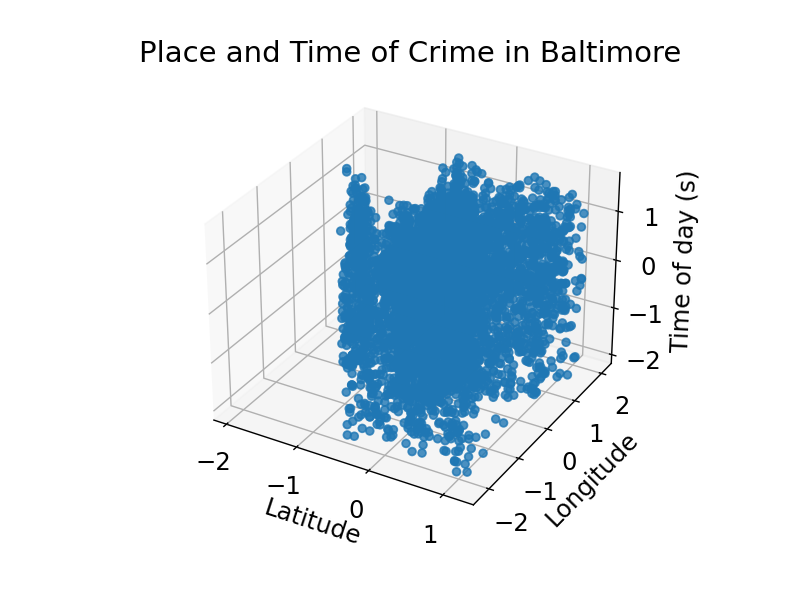

In [313]:
fig = plt.figure()
ax = plt.axes(projection ="3d")

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
plot2 = ax.scatter3D(balt_normed["Lat"], balt_normed["Lon"], balt_normed["Seconds"],
                    alpha = 0.8
                    )
 
plt.title("Place and Time of Crime in Baltimore")
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Time of day (s)')

plt.show()

#### We'll do a DBSCAN first, seems like an epsilon of 0.25 and a minimum number of samples of 5 creates some groupings, but you'll see in the evaluation down below, that the groupings are not very distinct

In [452]:
dbscan2 = DBSCAN(eps=0.25, min_samples=5)
balt_normed["cluster"] = dbscan2.fit_predict(balt_normed[['Lat','Lon', 'Seconds']])

In [453]:
balt_normed["cluster"].value_counts()

cluster
 0     4771
-1      146
 5       23
 2       18
 3        7
 1        6
 9        6
 10       5
 6        5
 7        4
 8        4
 4        3
Name: count, dtype: int64

In [454]:
metrics.silhouette_score(balt_normed[['Lat','Lon', 'Seconds']], balt_normed.cluster)

-0.10450662179161667

<IPython.core.display.Javascript object>


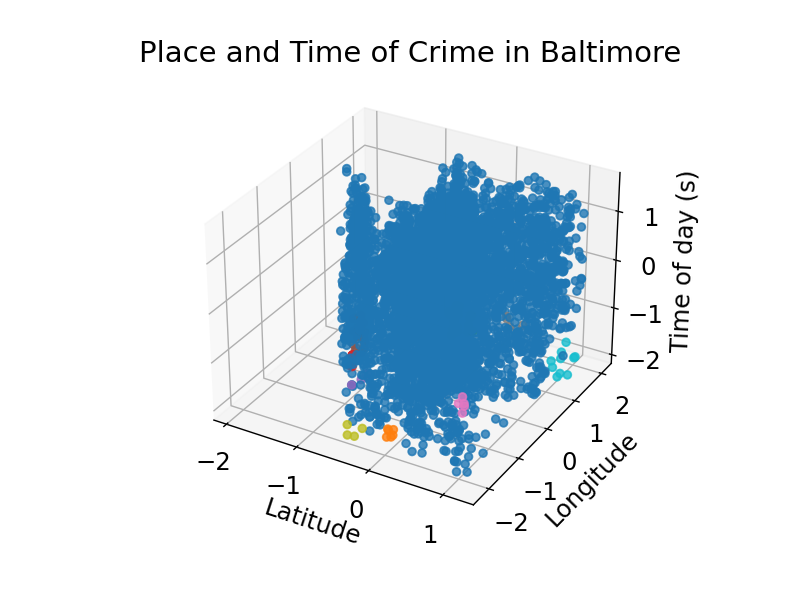

In [455]:
fig = plt.figure()
ax = plt.axes(projection ="3d")

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
plot2 = ax.scatter3D(balt_normed["Lat"], balt_normed["Lon"], balt_normed["Seconds"],
                    alpha = 0.8,
                     c = balt_normed["cluster"],
                    cmap = "tab10"
                    )
 
plt.title("Place and Time of Crime in Baltimore")
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Time of day (s)')

plt.show()

#### Here we can evaluate the DBSCAN with a range of epislon sizes and minimum samples. It looks like the larger epsilons creates more confidence that the groups are distinct, but also lumps each data point largely into a single group.

In [443]:
min_samples = np.arange(4,10)
epsilons = np.arange(0.1, 0.6, 0.01)

In [444]:
all_scores = []
for min_sample in min_samples:
    scores = []
    for epsilon in epsilons:
        dbscan2 = DBSCAN(eps=epsilon, min_samples=min_sample)
        balt_normed["cluster"] = dbscan2.fit_predict(balt_normed[['Lat','Lon', 'Seconds']])
        
        # calculate silouette score here
        score = metrics.silhouette_score(balt_normed[['Lat','Lon', 'Seconds']], balt_normed.cluster)
        scores.append(score)
    all_scores.append(scores)

In [445]:
len(all_scores)

6

<IPython.core.display.Javascript object>


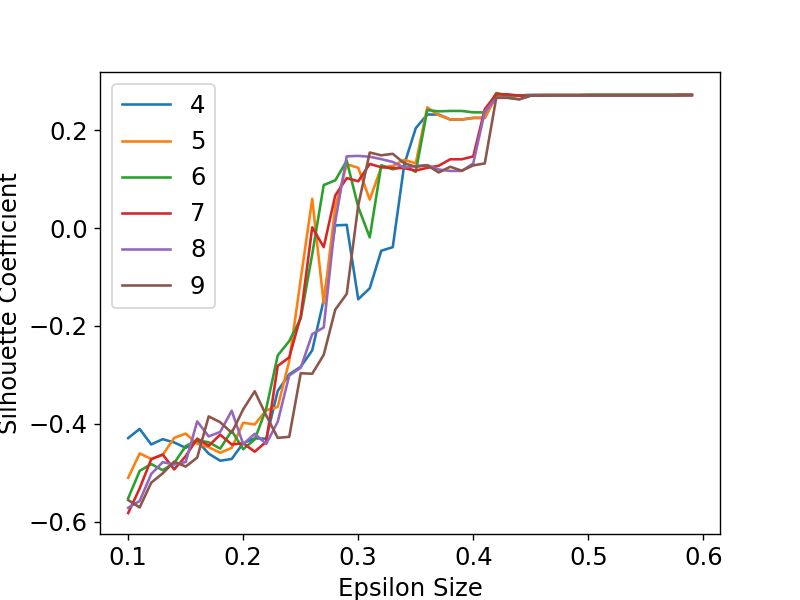

In [447]:
plt.figure()
plot = plt.plot(epsilons, all_scores[0],
                epsilons, all_scores[1],
                epsilons, all_scores[2],
                epsilons, all_scores[3],
                epsilons, all_scores[4],
                epsilons, all_scores[5]
               )
plt.xlabel('Epsilon Size')
plt.ylabel('Silhouette Coefficient')
plt.legend(plot, ['4', '5', '6', '7', '8', '9'])
plt.show()

#### Now lets do k-means!

In [463]:
N = 3
from sklearn.cluster import KMeans
km = KMeans(n_clusters=N, random_state=1, n_init="auto")
km.fit(balt_normed[['Lat','Lon', 'Seconds']])
balt_normed['cluster'] = km.predict(balt_normed[['Lat','Lon', 'Seconds']])

In [464]:
balt_normed.cluster.value_counts()

cluster
0    2032
2    1529
1    1437
Name: count, dtype: int64

<IPython.core.display.Javascript object>


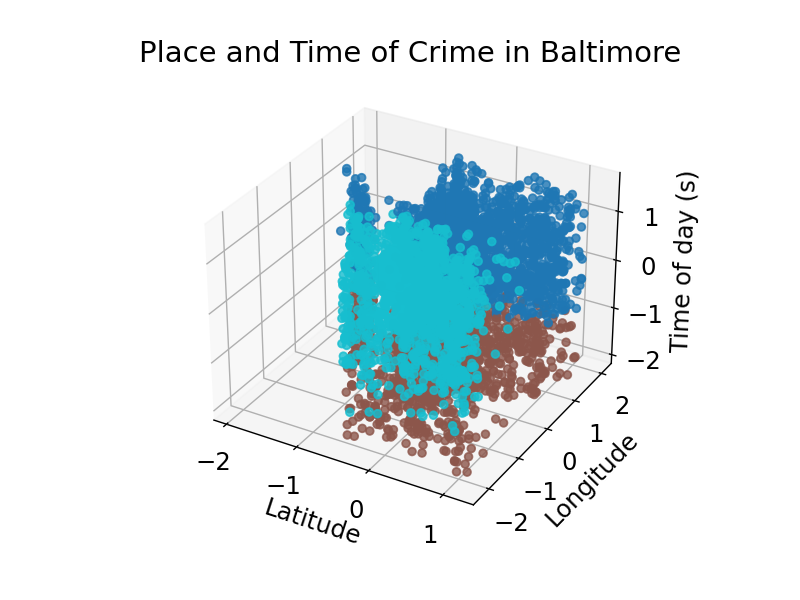

In [465]:
fig = plt.figure()
ax = plt.axes(projection ="3d")

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
plot2 = ax.scatter3D(balt_normed["Lat"], balt_normed["Lon"], balt_normed["Seconds"],
                    alpha = 0.8,
                     c = balt_normed["cluster"],
                    cmap = "tab10"
                    )
 
plt.title("Place and Time of Crime in Baltimore")
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Time of day (s)')

plt.show()

In [461]:
k_range = range(2, 15)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1, n_init="auto")
    labels = km.fit_predict(balt_normed[['Lat', 'Lon', 'Seconds']])
    scores.append(metrics.silhouette_score(balt_normed[['Lat', 'Lon', 'Seconds']], labels))

<IPython.core.display.Javascript object>


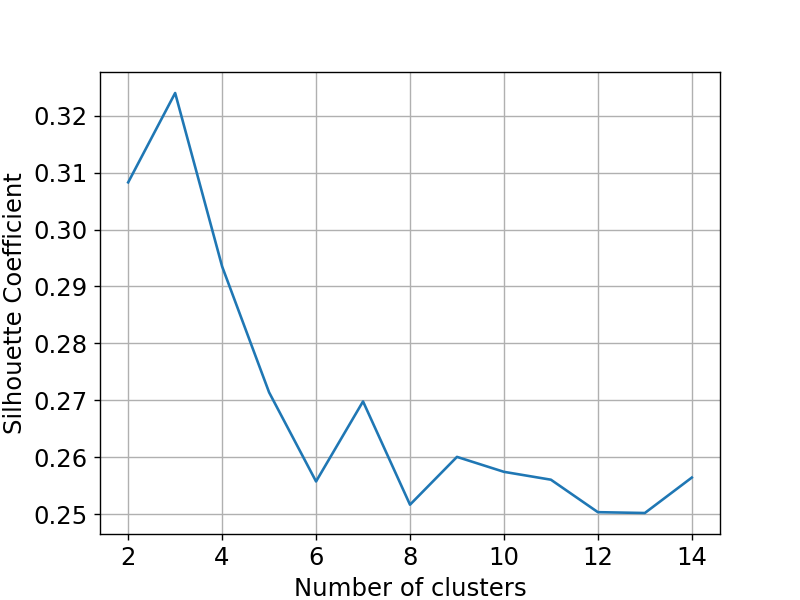

In [462]:
plt.figure()
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()